# Data Acquisition
I wrote all letters/phrases on the white-background A4 papers using the same type of pen. The images were taken using the Iphone 13 under sufficient lighting, scanned by CamScanner and manually cropped into squared frames. Therefore, it is important to note that **the dataset is very clean and balanced among classes** (which does not necessarily reflect the real-life situations where the images are of low quality and imbalanced). It consists of **300 samples** of individual letters, 100 samples of each class: a, ă, â.

## Import Libraries

In [ ]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File reading
import os
from google.colab import drive
from typing import List

In [ ]:
# Image Preprocessing
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, thin
from skimage import data
from skimage.util import invert

In [ ]:
# Connect Google Drive with Google Colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Loading

In [ ]:
class LoadDataset:
  def __init__(self, path: str):
    """
    Initialize the folder path to the dataset.

    Args:
      path (str): The path to the dataset.
    """
    self.path = path


  def collect_image_files(self) -> List[str]:
    """
    Collects all image files from the specified folder.

    Args:
      folder_path (str): The path to the folder containing the images.

    Returns:
      List[str]: A list of paths to all image files found in the folder.
    """
    image_files = []
    for dirname, _, filenames in os.walk(self.path):
      for filename in filenames:
        image_files.append(os.path.join(dirname, filename))
    return image_files



  def show_images(self, images_list: List[str], rows: int=10, cols: int=10) -> None:
    """
    Displays a grid of images from the given list.

    Args:
      images_list (List[str]): A list of paths to image files.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    axes = axes.ravel()

    for i, image_path in enumerate(images_list):
      if i >= rows * cols:
        break
      try:
        img = cv.imread(image_path)
        if img is None:
          raise Exception(f"Failed to load image: {image_path}")

        axes[i].imshow(img)

      except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

    plt.tight_layout()
    plt.show()

## Display Original Images

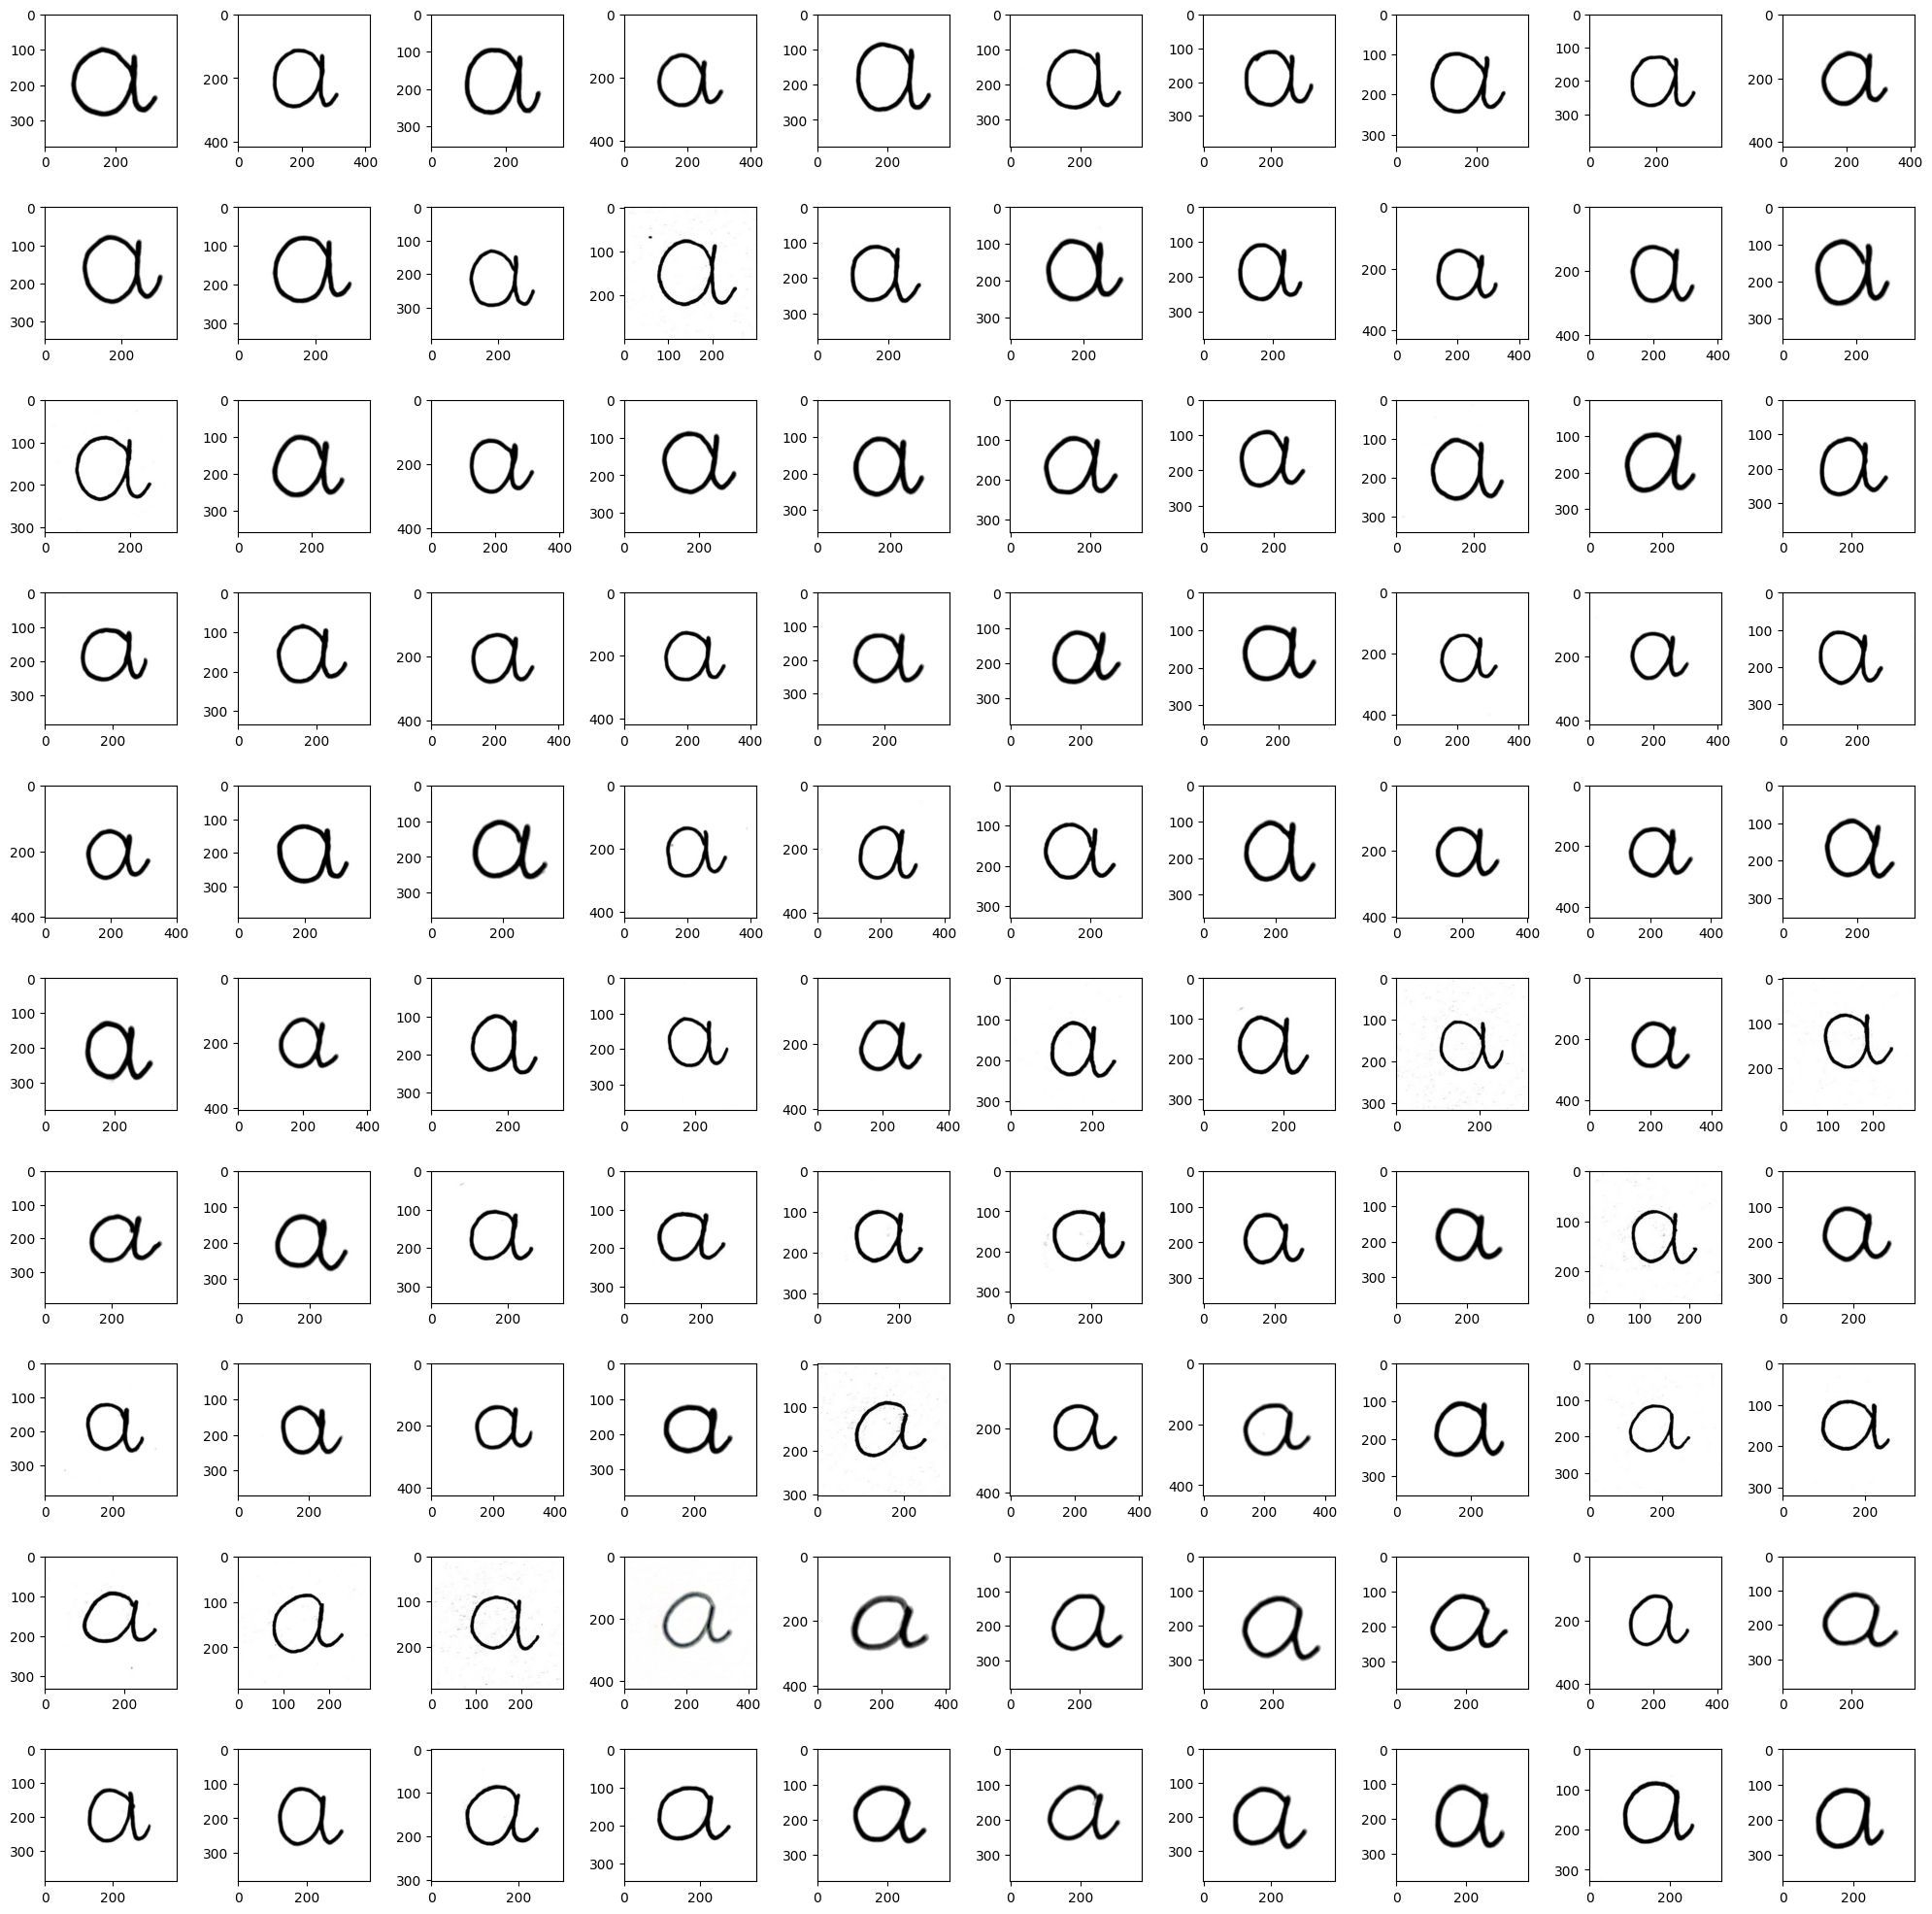

In [ ]:
# Visualize original images of letter a
folder_path_a = "/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Raw Data/letter_a_samples"
letter_a_samples = LoadDataset(folder_path_a)
image_files_a = letter_a_samples.collect_image_files()
letter_a_samples.show_images(image_files_a)

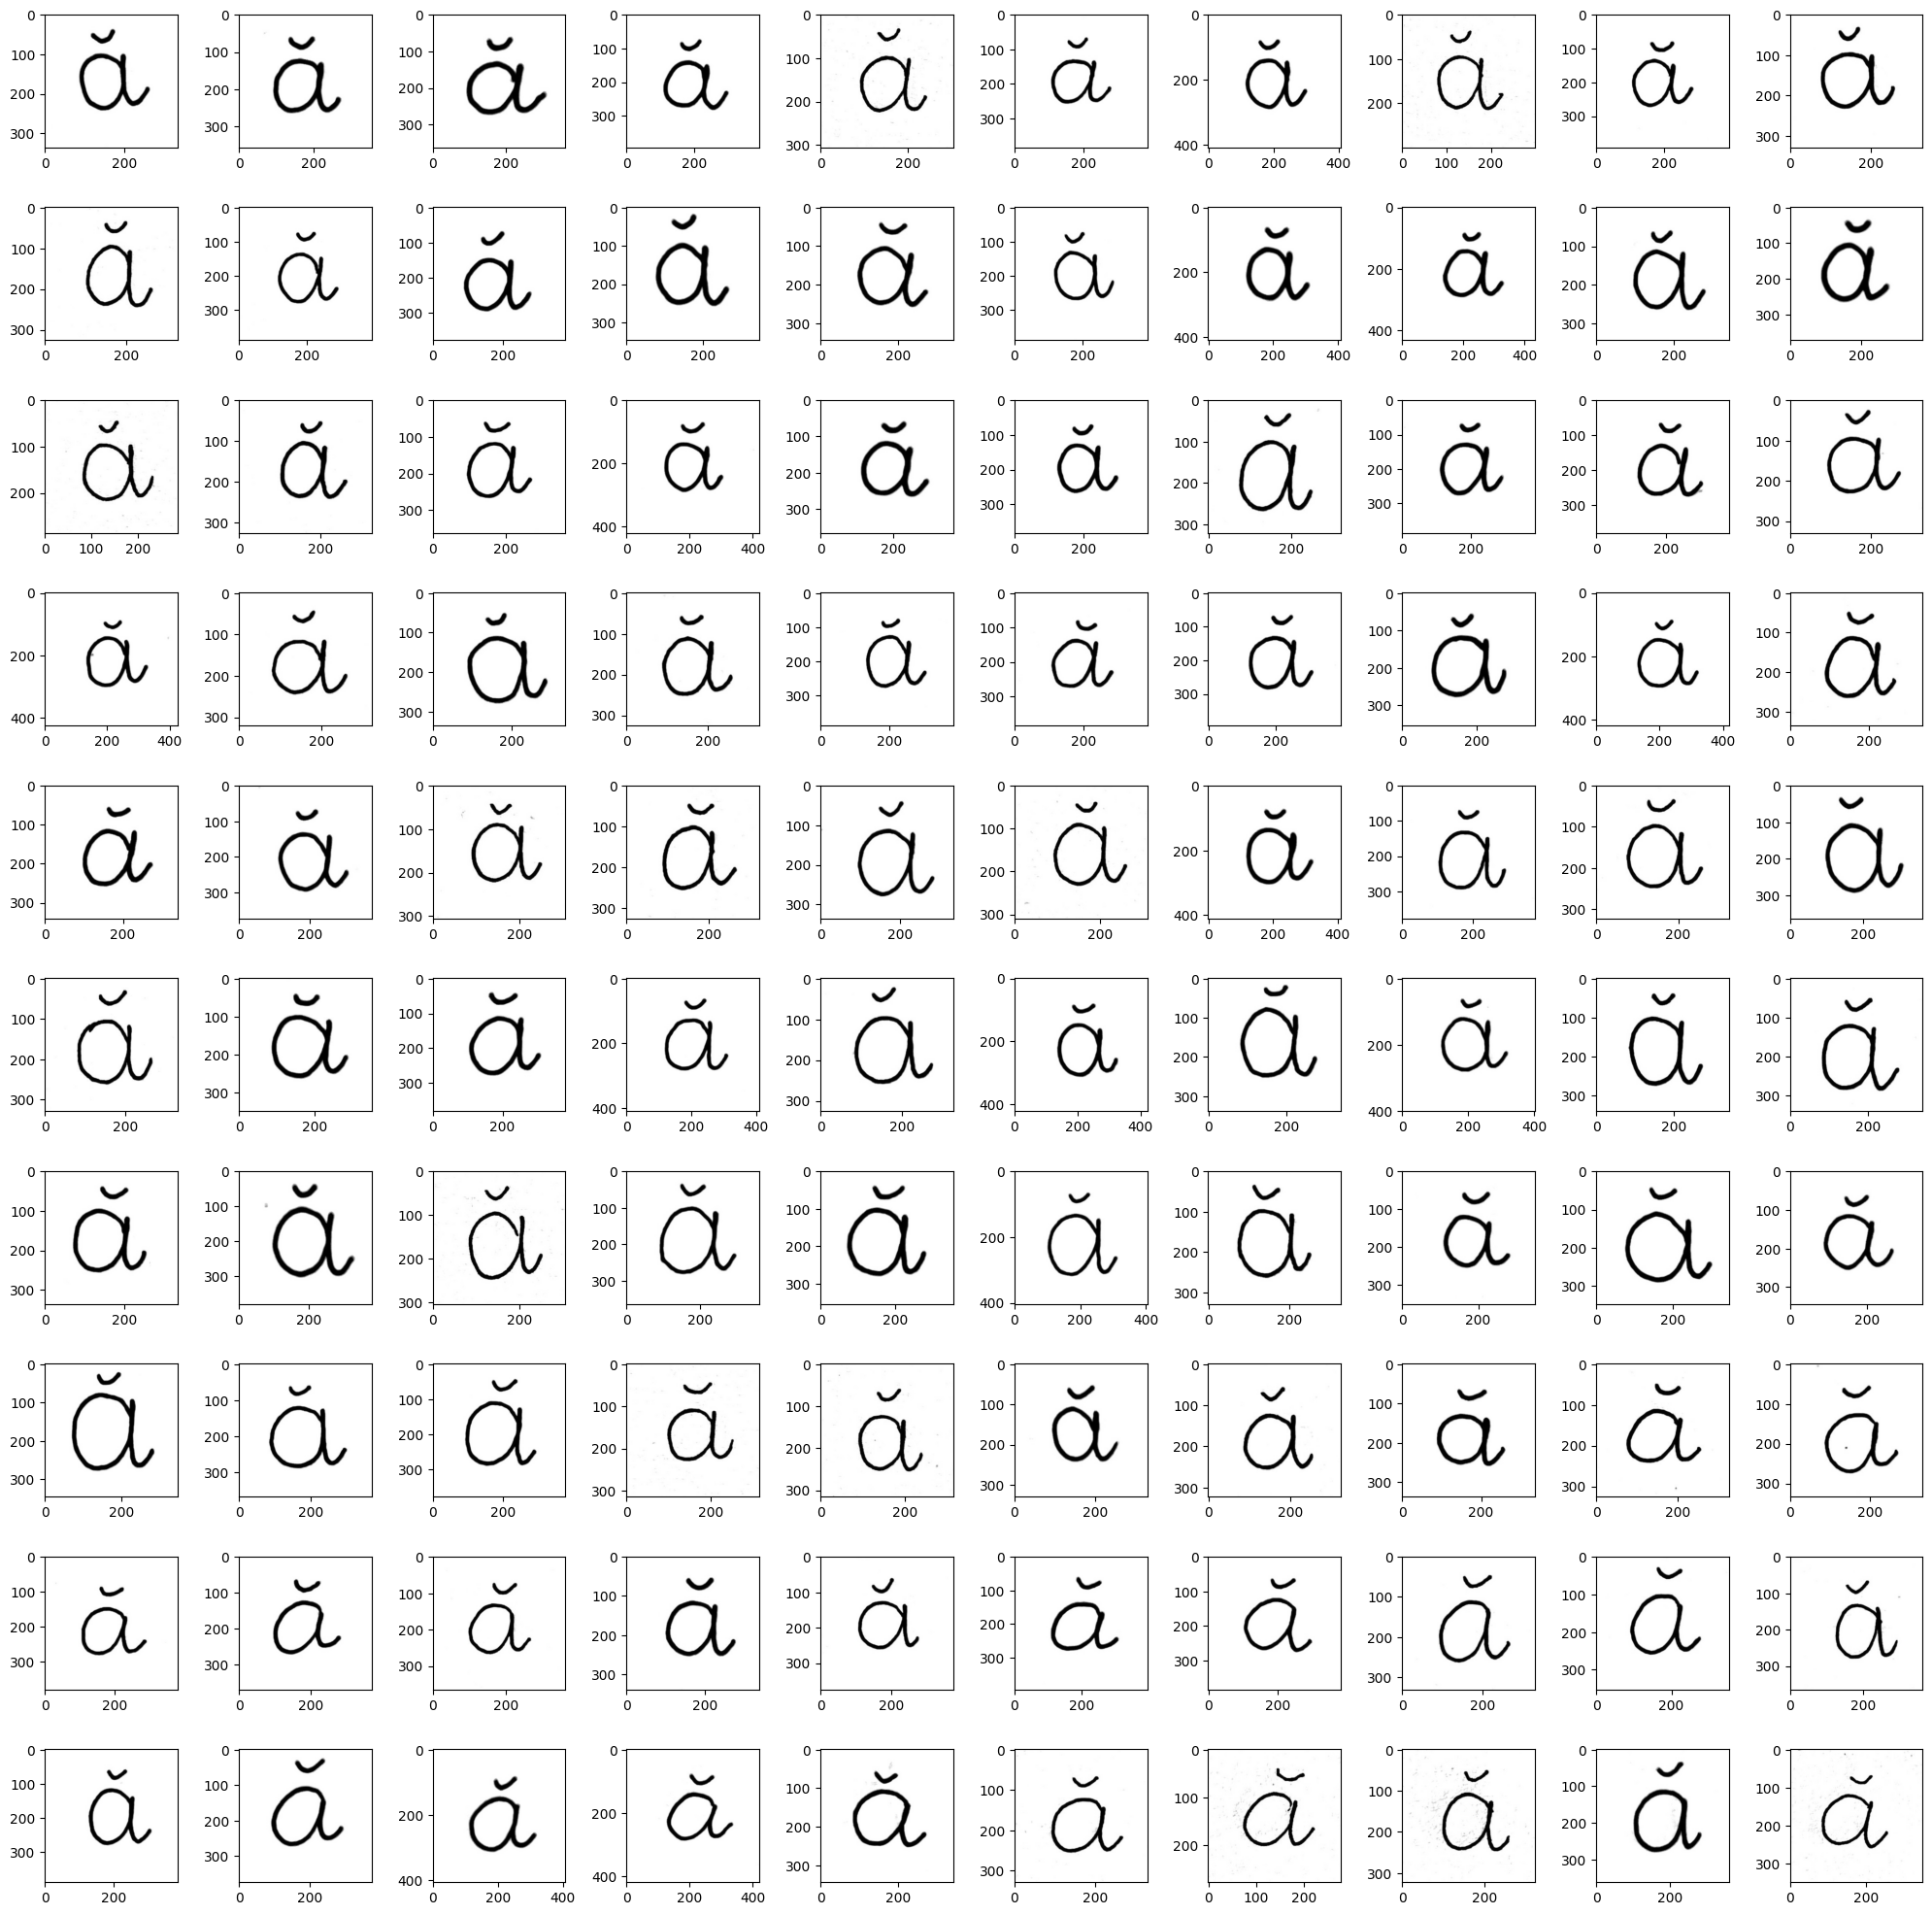

In [ ]:
# Visualize original images of letter ă
folder_path_aw = "/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Raw Data/letter_ă_samples"
letter_aw_samples = LoadDataset(folder_path_aw)
image_files_aw = letter_aw_samples.collect_image_files()
letter_aw_samples.show_images(image_files_aw)

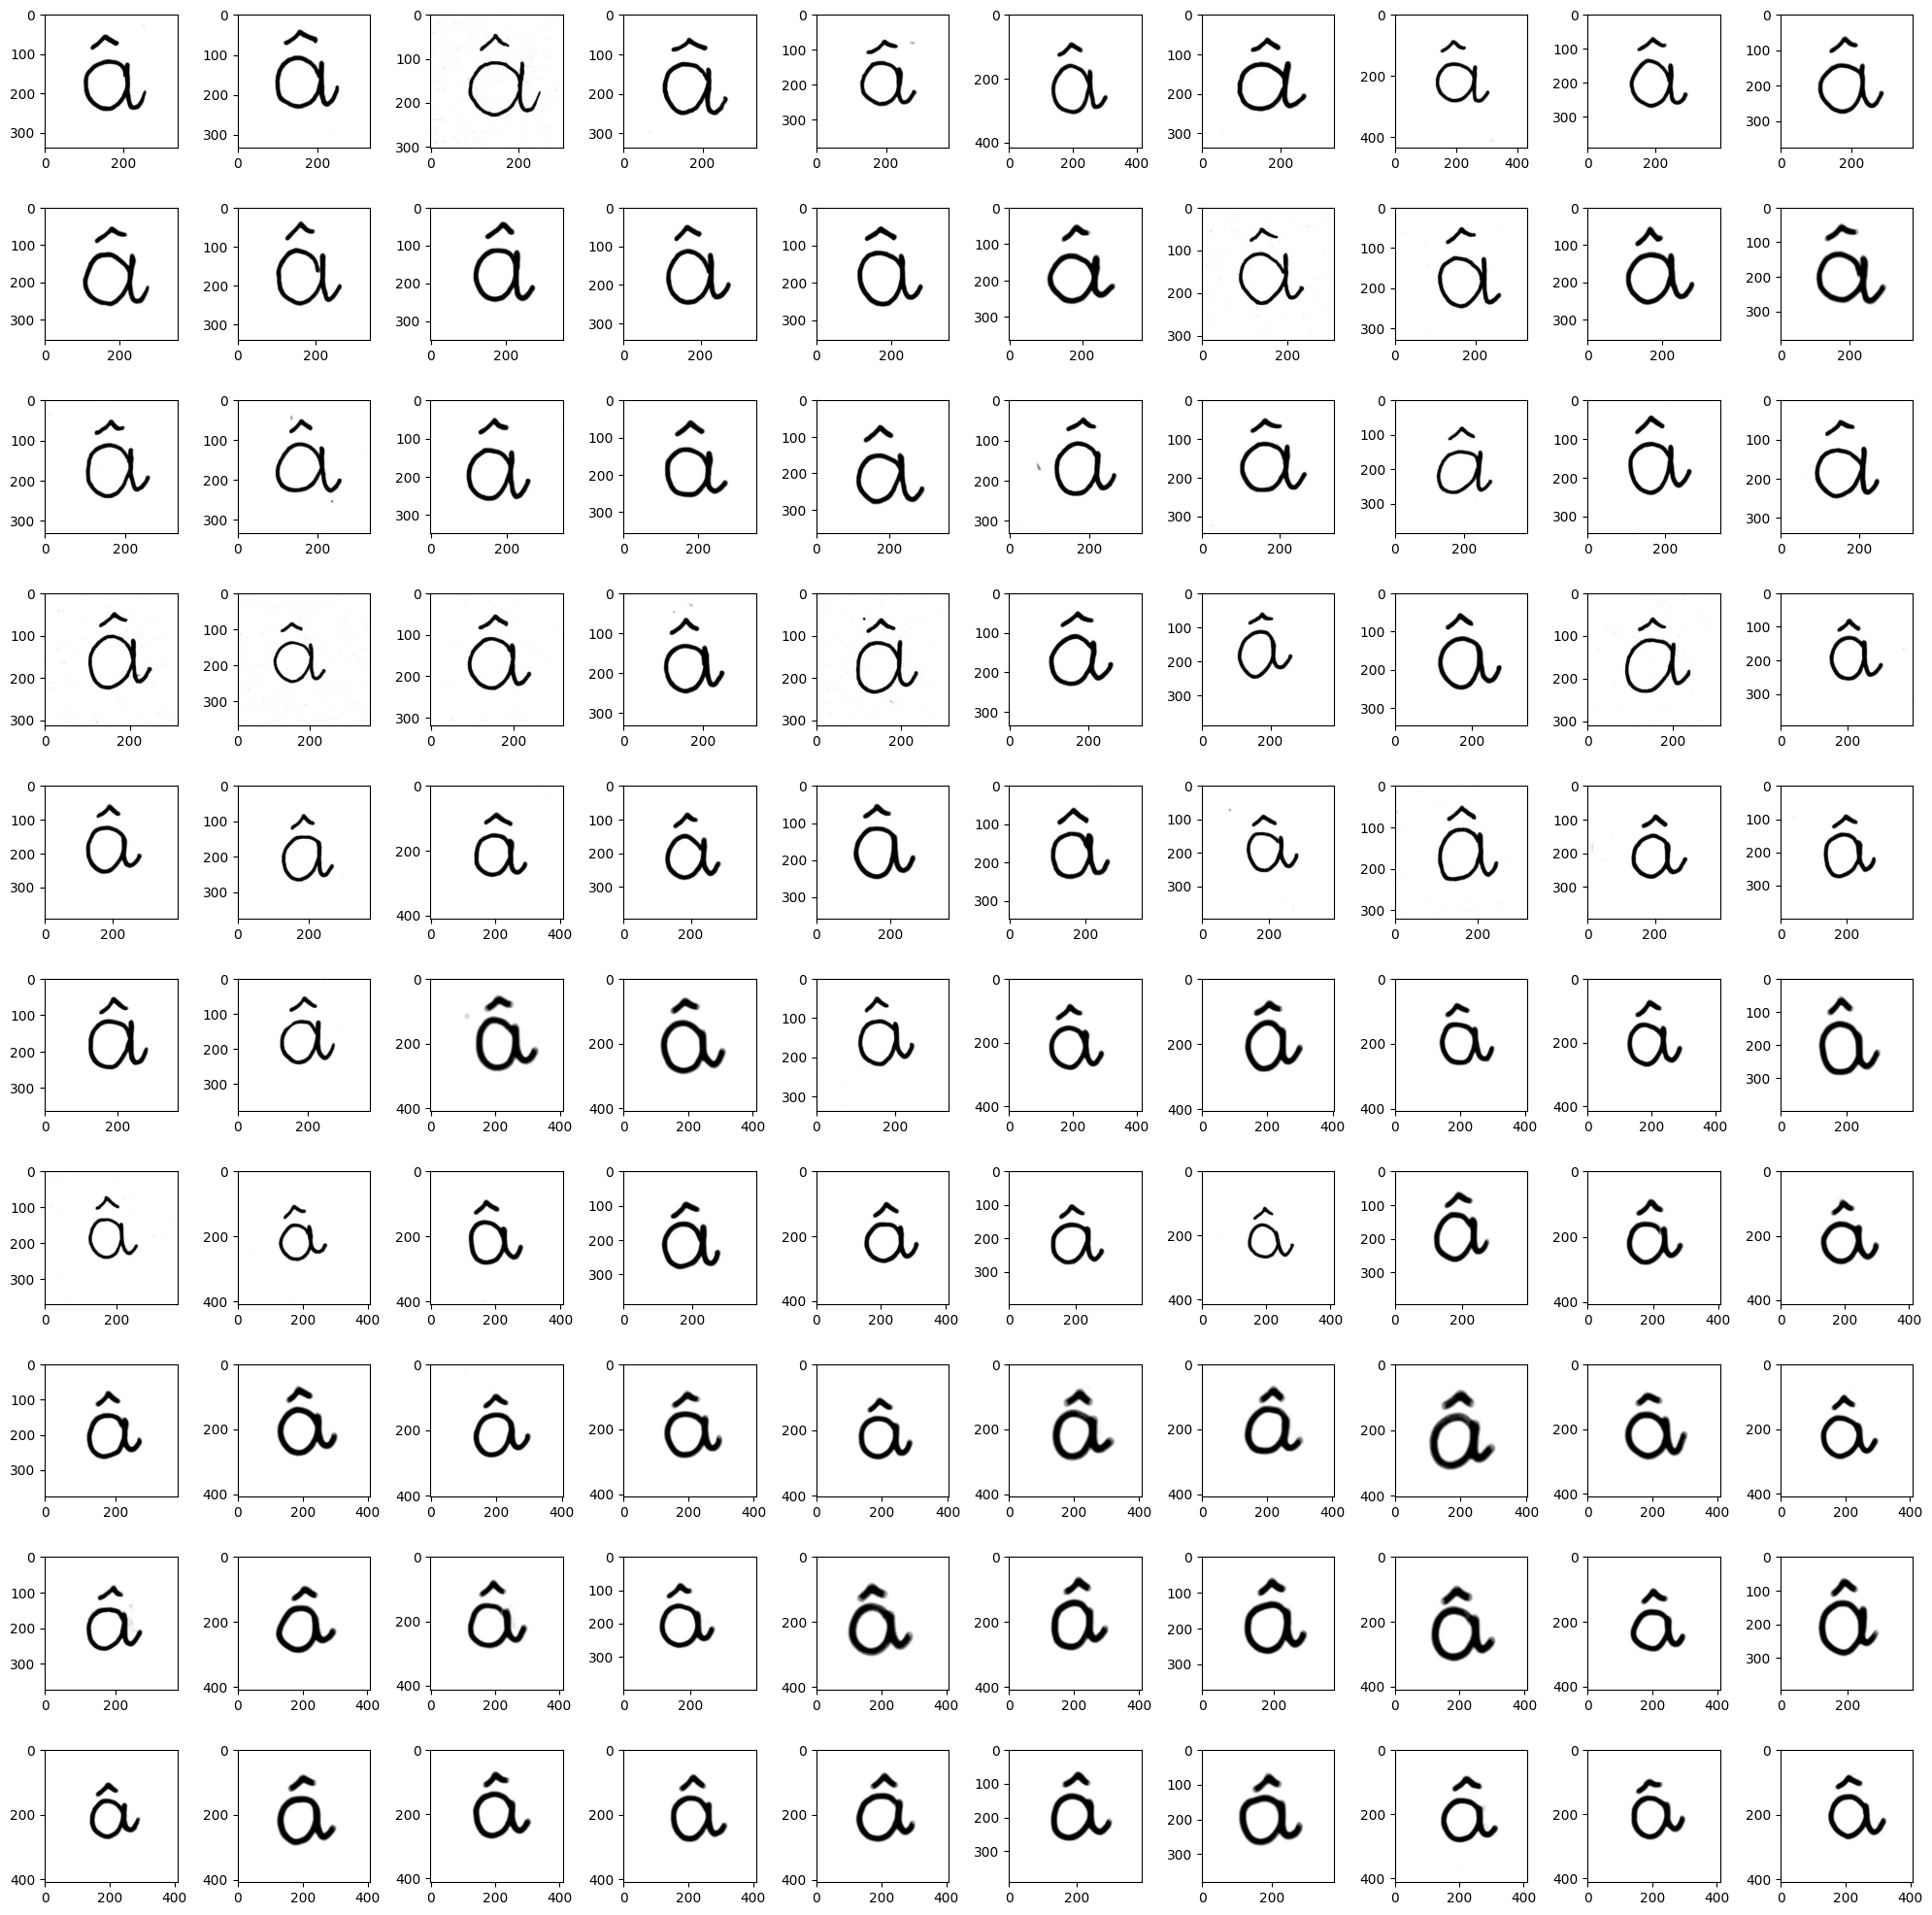

In [ ]:
# Visualize original images of letter â
folder_path_aa = "/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Raw Data/letter_â_samples"
letter_aa_samples = LoadDataset(folder_path_aa)
image_files_aa = letter_aa_samples.collect_image_files()
letter_aa_samples.show_images(image_files_aa)

## Data Labeling & Splitting

In [ ]:
# Label data
a_labeled_images = {a_image: 0 for a_image in image_files_a}
aw_labeled_images = {aw_image: 1 for aw_image in image_files_aw}
aa_labeled_images = {aa_image: 2 for aa_image in image_files_aa}
all_images = {**a_labeled_images, **aw_labeled_images, **aa_labeled_images}

In [ ]:
# Convert data into dataframe
df = pd.DataFrame(list(all_images.items()), columns=['image_file', 'label'])
df

,image_file,label
0,/content/gdrive/MyDrive/24-25 Academic Year/CS...,0
1,/content/gdrive/MyDrive/24-25 Academic Year/CS...,0
2,/content/gdrive/MyDrive/24-25 Academic Year/CS...,0
3,/content/gdrive/MyDrive/24-25 Academic Year/CS...,0
4,/content/gdrive/MyDrive/24-25 Academic Year/CS...,0
...,...,...
295,/content/gdrive/MyDrive/24-25 Academic Year/CS...,2
296,/content/gdrive/MyDrive/24-25 Academic Year/CS...,2
297,/content/gdrive/MyDrive/24-25 Academic Year/CS...,2
298,/content/gdrive/MyDrive/24-25 Academic Year/CS...,2


In [ ]:
# Split data into train and test sets
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
train_size = int(0.8 * len(df_shuffled))
train_df = df_shuffled[:train_size]
test_df = df_shuffled[train_size:]

In [ ]:
# Training set - Class balance check
train_df['label'].value_counts()

,count
label,
2,82
0,80
1,78


In [ ]:
# Test set - Class balance check
test_df['label'].value_counts()

,count
label,
1,22
0,20
2,18


In [ ]:
# Save train and test data
train_df.to_csv('/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/handwritten_train_set.csv', index=False)
test_df.to_csv('/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/handwritten_test_set.csv', index=False)